<font color='Blue'><h3>Student Name: Binaya Sharma</h3></font>
<font color='Orange'><h3>University ID: 1930050</h3></font>

#Submitted Date: June 10, 2020

<center><h1>Plant Disease Detection</h1> </center>

In [1]:
# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import model_from_json


Using TensorFlow backend.


In [2]:
batch_size = 32

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

In [5]:
import os
os.chdir('C:\\Users\\Binaya.DESKTOP-AAL8H23\\Desktop\\PlantDiseaseDetection\\PlantVillage')
classes = os.listdir()
d = dict(zip(range(len(classes)),classes))
print(d)

{0: 'model.h5', 1: 'model.json', 2: 'Pepper__bell___Bacterial_spot', 3: 'Pepper__bell___healthy', 4: 'Potato___Early_blight', 5: 'Potato___healthy', 6: 'Potato___Late_blight', 7: 'Tomato_Bacterial_spot', 8: 'Tomato_Early_blight', 9: 'Tomato_healthy', 10: 'Tomato_Late_blight', 11: 'Tomato_Leaf_Mold', 12: 'Tomato_Septoria_leaf_spot', 13: 'Tomato_Spider_mites_Two_spotted_spider_mite', 14: 'Tomato__Target_Spot', 15: 'Tomato__Tomato_mosaic_virus', 16: 'Tomato__Tomato_YellowLeaf__Curl_Virus'}


In [6]:
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'C:\\Users\\Binaya.DESKTOP-AAL8H23\\Desktop\\PlantDiseaseDetection\\PlantVillage',  # This is the source directory for training images
        target_size=(100, 100),  # All images will be resized to 100 x 100
        batch_size=batch_size,
    
        # Specify the classes explicitly ##classes = 16, Here We have 16 Classes
        classes = ['Pepper__bell___Bacterial_spot','Pepper__bell___healthy', 'Potato___Early_blight', 
                   'Potato___healthy','Potato___Late_blight','Tomato_Bacterial_spot','Tomato_Early_blight', 'Tomato_healthy',
                   'Tomato_Late_blight','Tomato_Leaf_Mold','Tomato_Septoria_leaf_spot', 
                   'Tomato_Spider_mites_Two_spotted_spider_mite','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus',
                   'Tomato__Tomato_YellowLeaf__Curl_Virus'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 20638 images belonging to 15 classes.


In [7]:
import tensorflow as tf

In [8]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 100x 100 with 3 bytes color
    # The first convolution
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fifth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(512, activation='relu'),
    
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(15, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         7

In [9]:
from tensorflow.keras.optimizers import RMSprop

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

total_sample=train_generator.n

n_epochs = 70

history = model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=n_epochs,
        verbose=1)

model.save('model.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 644 steps
Epoch 1/70
644/644 [==============================] - 130s 202ms/step - loss: 1.6240 - acc: 0.4648 2:04 - lo - ETA: 1:43 - loss: 2.3892  - ETA: 1:39 - loss: 2.3710 - acc: 0.2 - ETA: 1: - ETA: 1:31 - ETA: 1:24 - loss: 2.2634 - acc: 0.254 - ETA:  - ETA: 17s - loss: 1. - ETA: 5s - l
Epoch 2/70
644/644 [==============================] - 54s 83ms/step - loss: 0.7275 - acc: 0.7545
Epoch 3/70
644/644 [==============================] - 53s 83ms/step - loss: 0.4968 - acc: 0.8306
Epoch 4/70
644/644 [==============================] - 53s 83ms/step - loss: 0.3743 - acc: 0.8771
Epoch 5/70
644/644 [==============================] - 54s 83ms/step - loss: 0.3059 - acc: 0.8990
Epoch 6/70
644/644 [==============================] - 54s 83ms/step - loss: 0.2625 - acc: 0.9146
Epoch 7/70
644/644 [==============================] - 57s 88ms/step - loss: 0.2242 - acc: 0.9299
Epoch 8/70
644/6

In [11]:
total_sample=train_generator.n
print(total_sample)

20638


Pepper__bell___Bacterial_spot


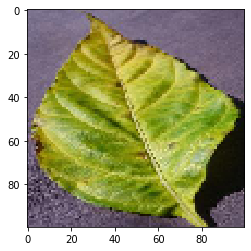

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
test_image = image.load_img('C:\\Users\\Binaya.DESKTOP-AAL8H23\\Desktop\\PlantDiseaseDetection\\PlantVillage\\Pepper__bell___Bacterial_spot\\0d8421cd-eebc-4018-b591-12352dd970a7___JR_B.Spot 3234.JPG', target_size = (100,100))
imageplot = plt.imshow(test_image)
x = image.img_to_array(test_image)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
#test_image = image.img_to_array(test_image)
result = model.predict(images, batch_size=10)


if result[0][0] == 1:
    print("Pepper__bell___Bacterial_spot")
elif result[0][1] == 1:
    print("Pepper__bell___healthy")
elif result[0][2] == 1:
    print("Potato___Early_blight")
elif result[0][3] == 1:
    print("Potato___healthy")
elif result[0][4] == 1:
    print("Potato___Late_blight")
elif result[0][5] == 1:
    print("Tomato_Bacterial_spot")
elif result[0][6] == 1:
    print("Tomato_Early_blight")
elif result[0][7] == 1:
    print("Tomato_healthy")
elif result[0][8] == 1:
    print("Tomato_Late_blight")
elif result[0][9] == 1:
    print("Tomato_Leaf_Mold")
elif result[0][10] == 1:
    print("Tomato_Septoria_leaf_spot")
elif result[0][11] == 1:
    print("Tomato_Spider_mites_Two_spotted_spider_mite")
elif result[0][12] == 1:
    print("Tomato__Target_Spot")
elif result[0][13] == 1:
    print("Tomato__Tomato_mosaic_virus")
elif result[0][14] == 1:
    print("Tomato__Tomato_YellowLeaf__Curl_Virus")

In [13]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

<center><h1>End of CW_2</h1> </center>